In [9]:
import pandas as pd
import numpy as np
import string
import spacy
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [10]:
musk = pd.read_csv('Elon_musk.csv',
                   encoding='latin',
                   error_bad_lines = False)
musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [11]:
musk=musk['Text']
musk

0                                  @kunalb11 Im an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [12]:
# remove both the leading and the trailing characters
musk = [y.strip() for y in musk]
musk

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [13]:
# Joining the list into one string/text
text = ' '.join(musk)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [14]:
#Punctuation
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation))
no_punc_text

"kunalb11 I'm an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It's getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

In [ ]:
#Tokenization
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
text_tokens = word_tokenize(no_punc_text)
text_tokens

In [ ]:
text_tokens[0:72]

In [19]:
len(text_tokens)

21373

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
my_stop_words

In [22]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['kunalb11', 'I', "'m", 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just']


In [23]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy']


In [24]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i', "'m", 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would']


In [25]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [26]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 I 'm alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought


In [27]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['kunalb11', 'I', "'", 'm', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations']


In [28]:
#@title FEATURE EXTRACTION
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [29]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,kunalb11,alien,idaacarmack,ray,trace,cyberpunk,hdr,nextlevel,have,try,...,dire,priority,surreal,propaganda,social,httpstcowjrzibkh1h,click,samwise,gamgee,altho
0,2695,231,2433,3615,4493,959,1670,3150,1665,4528,...,1075,3504,4248,3540,4031,2325,773,3816,1525,247


In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

In [ ]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

In [ ]:
print(vectorizer.vocabulary_)

In [39]:
print(vectorizer.get_feature_names_out()[50:100])

['23' '230' '24' '240am' '247teslanew' '25' '250' '250kw' '25d'
 '25gunsteslacom' '25k' '25th' '28' '28delayslater' '28th' '29' '2k' '2nd'
 '2v' '30' '300' '301' '304' '304l' '31' '33' '330' '360' '37' '3800'
 '394' '39a' '3d' '3rd' '40' '400' '42' '420' '4227' '430' '43rd' '445pm'
 '448' '4530000' '45thspacewe' '4680' '479000' '48' '4d' '4th']


In [40]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
print(X.toarray().shape)

(16023, 4965)


In [44]:
#performing bigram and trigram
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(musk)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [ ]:
print(vectorizer_ngram_range.get_feature_names_out())

In [ ]:
print(bow_matrix_ngram.toarray())

In [60]:
#@title TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm=None,
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)

tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(musk)

In [ ]:
print(vectorizer_n_gram_max_features.get_feature_names_out())

In [64]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         4.07911388]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [65]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(60, 40)) # Set figure size
    plt.imshow(wordcloud)  # Display imag
    plt.axis("off") # No axis details

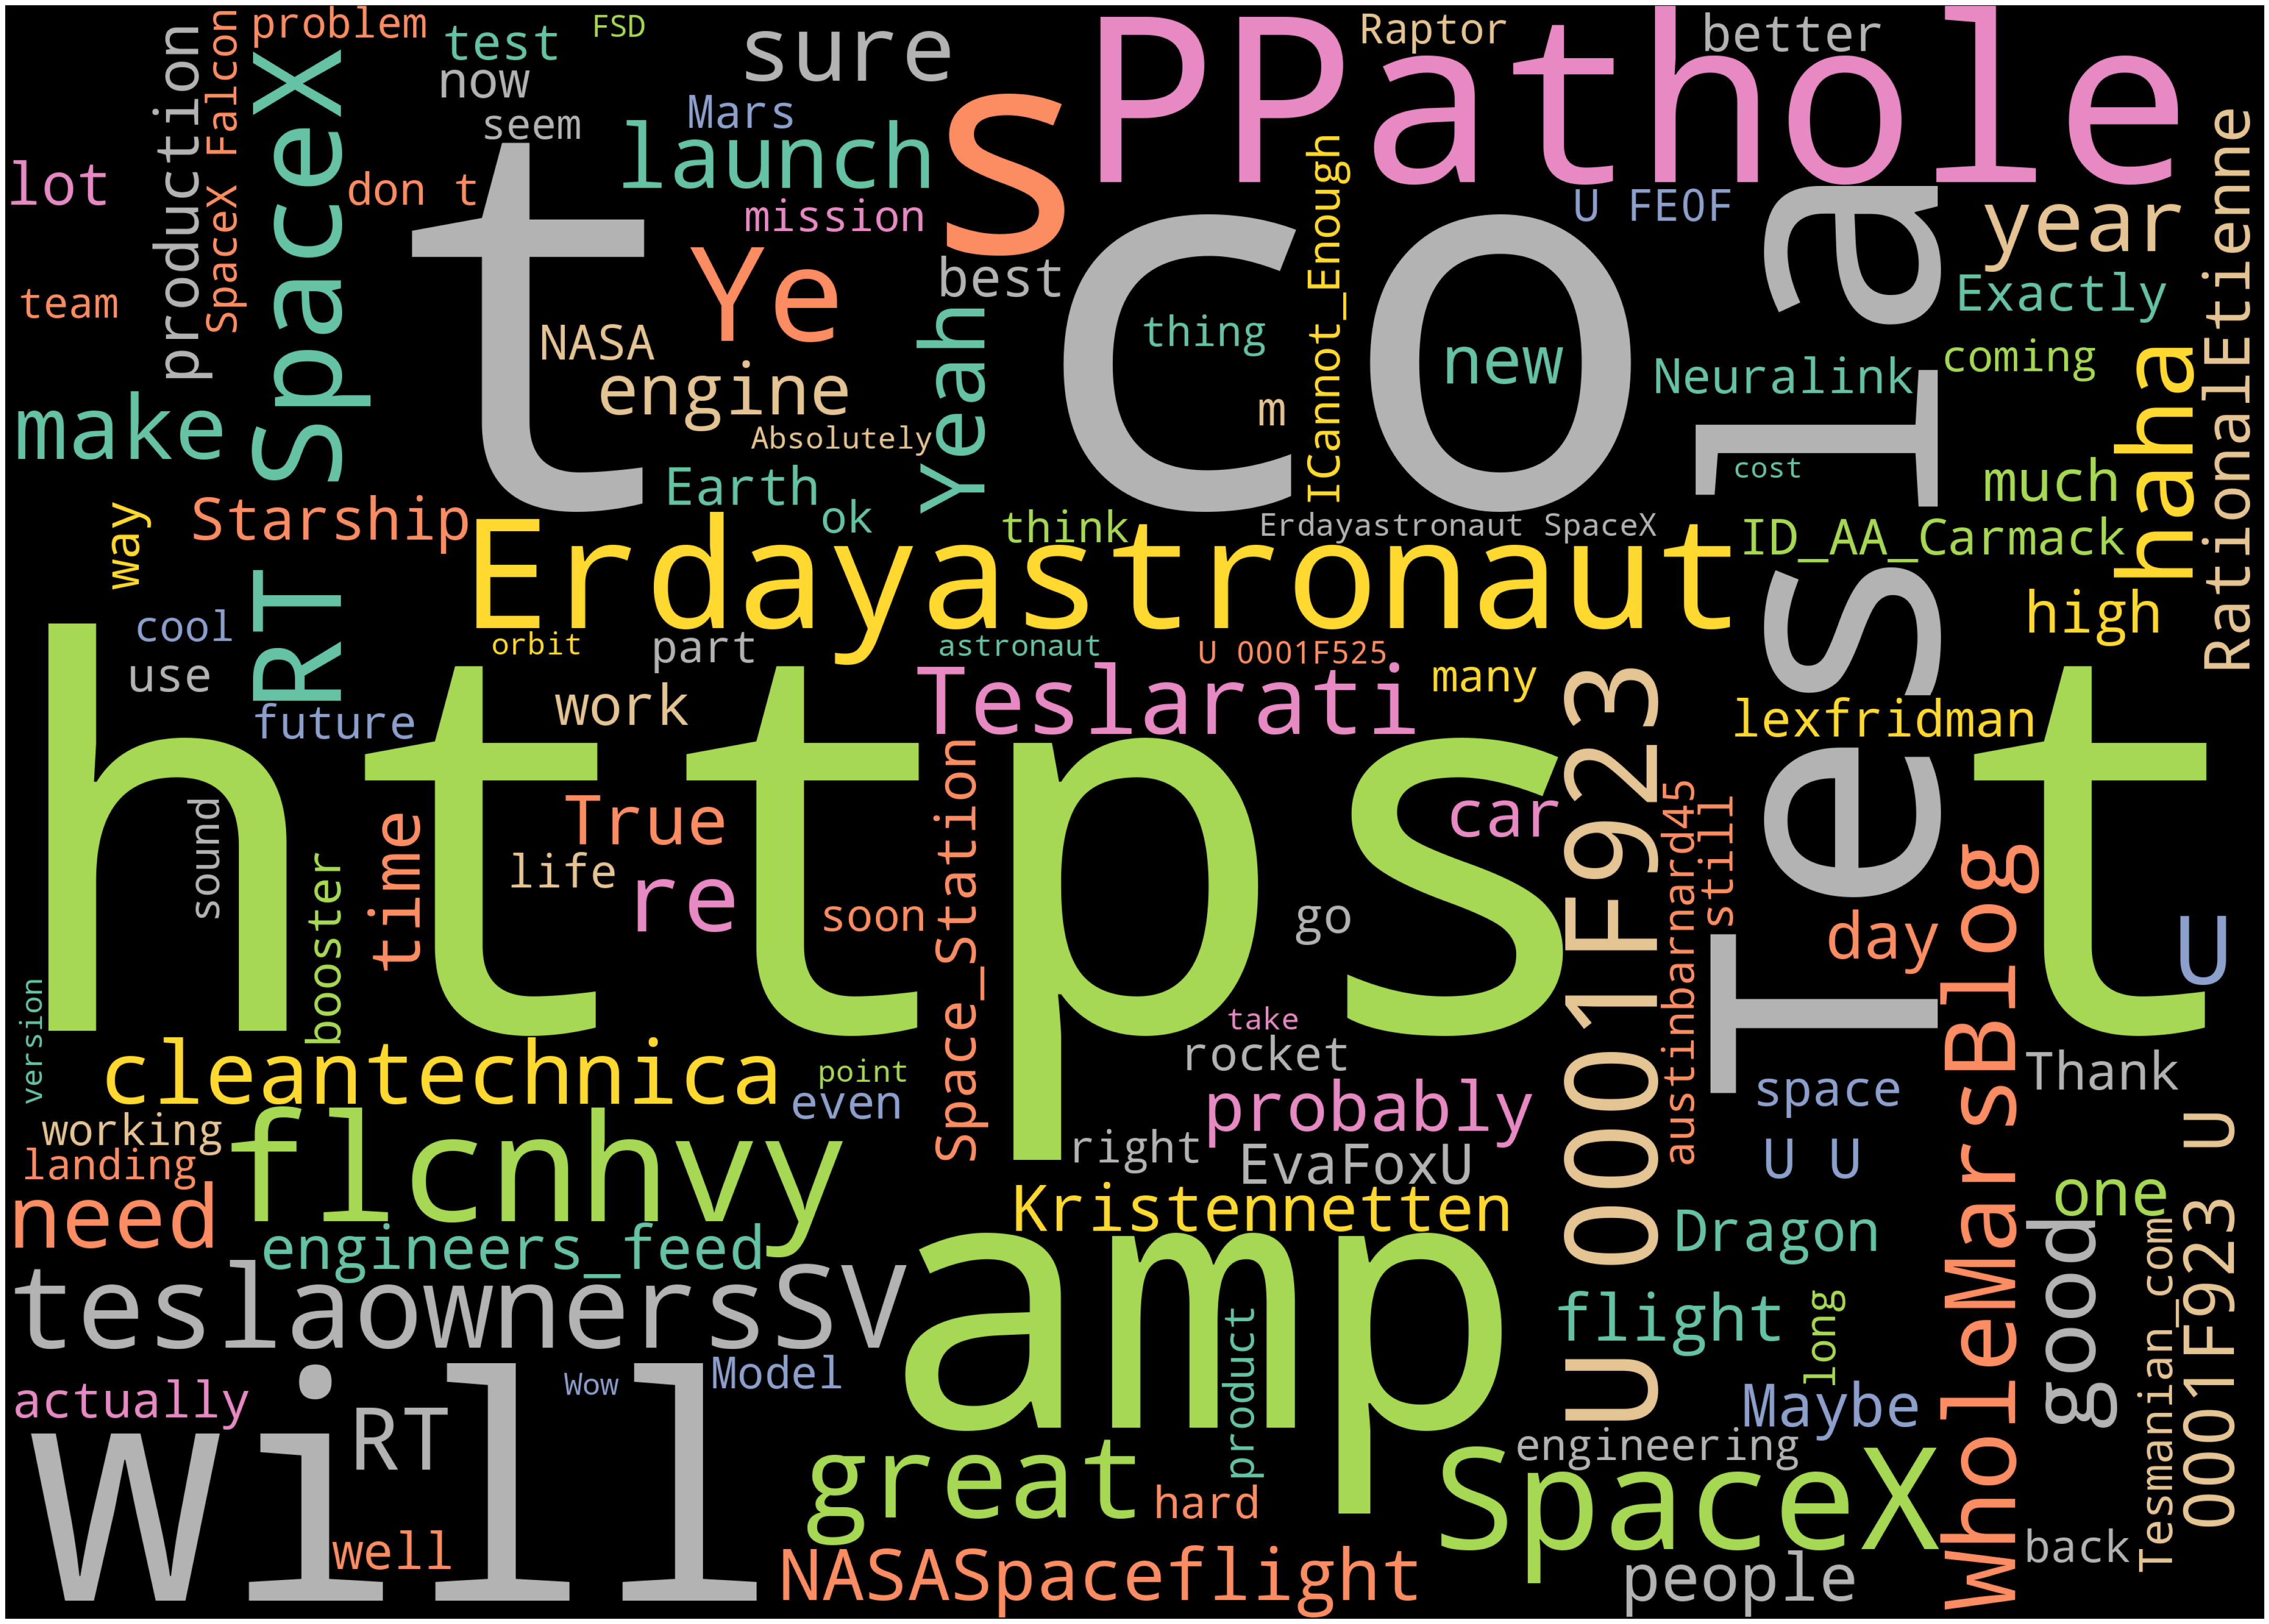

In [66]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500,
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [ ]:
musk2 = pd.read_csv('Elon_musk.csv', encoding='latin', error_bad_lines = False)
musk2

In [ ]:
musk2 = musk2['Text']
musk2

In [ ]:
musk2 = [x.strip() for x in musk2] # remove both the leading and the trailing characters
musk2 = [x for x in musk2 if x] # removes empty strings, because they are considered in Python as False
musk2[0:10]

In [ ]:
one_block = musk2[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [71]:
one_block

'@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?'

In [ ]:
for token in doc_block[:]:
    print(token, token.pos_)

In [73]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]

#print(nouns_verbs[5:25])
nouns_verbs

['tracing', 'level', 'tried']

In [74]:
len(nouns_verbs)

3

In [ ]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
X

In [76]:
X.shape

(3, 3)

In [ ]:
X.toarray()

In [79]:
cv.get_feature_names_out()

array(['level', 'tracing', 'tried'], dtype=object)

In [81]:
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names_out())
temp_df

,level,tracing,tried
0,0,1,0
1,1,0,0
2,0,0,1


In [82]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1]])

In [83]:
type(sum_words)

numpy.matrix

In [84]:
cv.vocabulary_

{'tracing': 1, 'level': 0, 'tried': 2}

In [85]:
sorted(cv.vocabulary_)

['level', 'tracing', 'tried']

In [ ]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names_out(),
                      'count' : np.array(sum_words).flatten()})
wf_df

<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

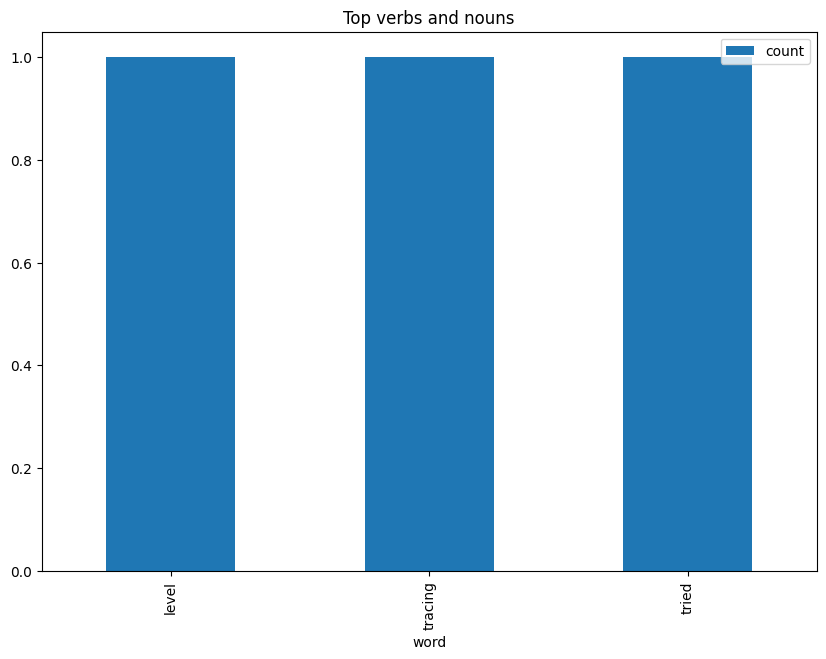

In [88]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')

In [90]:
#Sentiment analysis
affin = pd.read_csv('Afinn.csv',
                   error_bad_lines=False,
                   sep = ",",
                   encoding = 'latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [91]:
affin[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(musk2))
sentences

In [ ]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

In [ ]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

In [97]:
nlp = spacy.load('en_core_web_sm')

In [98]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [99]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [100]:
calculate_sentiment(text = 'wonderful session')

4

In [101]:
calculate_sentiment(text = 'great job, best explanation ever')

6

In [102]:
calculate_sentiment(text = 'good')

3

In [103]:
calculate_sentiment(text = 'What a ridiculous')

-3

In [104]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [105]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
sent_df

In [107]:
sent_df.iloc[4,0]

'Now on to the next for even more!!'

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

In [ ]:
sent_df.sort_values(by='sentiment_value').tail(10)

In [ ]:
sent_df.sort_values(by='sentiment_value').head(15)

In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

In [112]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [113]:
sent_df[sent_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
64,"Also, the road to hell is mostly paved with ba...",-7,11
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
840,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61


In [114]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
650    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
840    Cool Model 3 review by @iamjamiefoxx https://t...
Name: sentence, dtype: object

In [115]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'Cool Model 3 review by @iamjamiefoxx https://t.co/hJDD7BjkE3 @teslacn Tesla will add a power lift gate at no cost @HansNoordsij Agreed, hydrogen fool sells make no sense Pronouns suck @historyofarmani Also, we get our lithium from Australia @nichegamer <U+0001F923><U+0001F923> @akinfermo Yeah, would have been way better just to send everyone $6k I bet no one on <U+0001F339> Twitter even *has* a guillotine!']

In [116]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [117]:
sent_df['index'] = range(0, len(sent_df))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

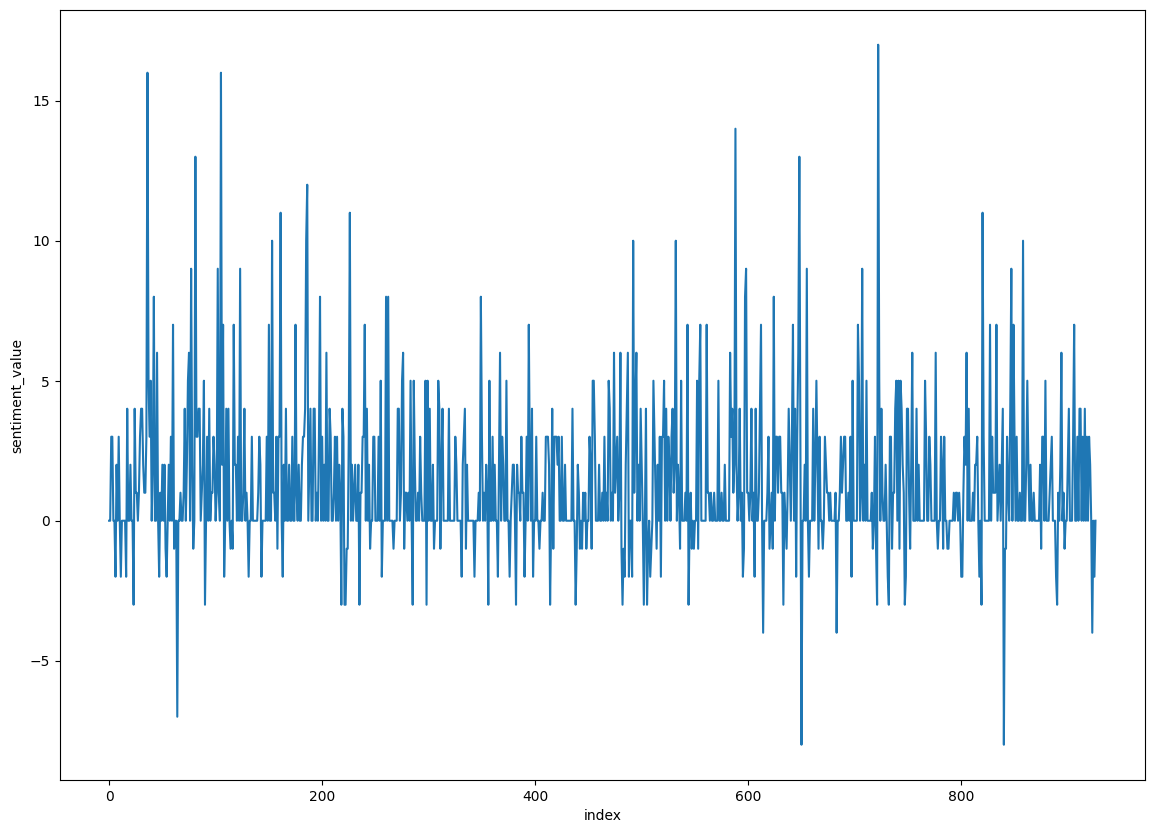

In [119]:
plt.figure(figsize=(14, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

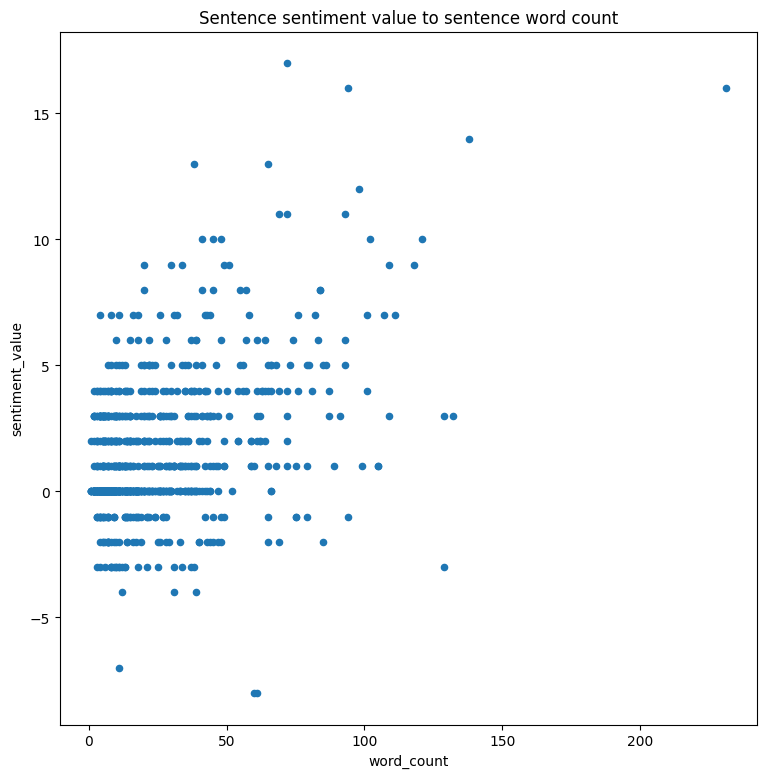

In [120]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')

In [ ]:
# PW for positive words
# NW for Negative Words
PW=pd.read_csv('positive-words.txt',
               error_bad_lines = False)
PW

In [ ]:
NW=pd.read_csv('negative-words.txt',
               error_bad_lines = False,
               encoding='latin-1')
NW

In [ ]:
PW =PW.iloc[25:]
PW =PW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
PW.reset_index(inplace=True)
PW =PW.drop('index',axis=1)
PW['Score'] = 1
PW

In [126]:
NW = NW.iloc[25:]
NW = NW.rename(columns={';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;':'Words'})
NW.reset_index(inplace=True)
NW = NW.drop('index',axis=1)
NW['Score'] = -1
NW

,Words,Score
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


In [ ]:
affinity_scores1 = PW.set_index('Words')['Score'].to_dict()
affinity_scores2 = NW.set_index('Words')['Score'].to_dict()
affinity_scores1.update(affinity_scores2)
affinity_scores = affinity_scores1
affinity_scores

In [128]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [129]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [ ]:
sent_df

In [ ]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

In [ ]:
sent_df.sort_values(by='sentiment_value').tail()

In [133]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count,index
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-5,60,650
765,A full blown Starship and SuperHeavy will be h...,-3,36,765
889,This is primarily an electrical/electronic (ch...,-3,69,889
365,4D is essential for dynamically occluded objec...,-3,45,365
158,We couldnt get everything done in https://t....,-3,65,158


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

In [135]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<0].head()

,sentence,sentiment_value,word_count,index
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-1,14,6
11,"However, if we don https://t.co/9Z8Ac6skqx @R...",-1,40,11
16,Thats what youre missing.,-1,4,16
23,https://t.co/UEEocOfcTb The people have spoken...,-1,37,23
30,The Second Last Kingdom https://t.co/Je4EI88Hm...,-1,38,30


In [136]:
sent_df[sent_df['sentiment_value']<-1]

,sentence,sentiment_value,word_count,index
55,You https://t.co/6gO7EHq9qy @avalonpenrose A ...,-2,30,55
64,"Also, the road to hell is mostly paved with ba...",-2,11,64
158,We couldnt get everything done in https://t....,-3,65,158
221,@RGVaerialphotos It will be real soon @MarcusH...,-2,18,221
222,External https://t.co/csIZk6sEVu @bcart03 @ne...,-2,31,222
242,@RationalEtienne @ShyCybertruck Fate loves iro...,-2,42,242
298,"No symptoms for past few days, apart from fati...",-2,9,298
306,"Last week, I had sym https://t.co/gL0mhrqJxY ...",-2,41,306
331,"Their main PCR search is for the N1 gene, uniq...",-2,28,331
365,4D is essential for dynamically occluded objec...,-3,45,365


In [137]:
sent_df[sent_df['sentiment_value']<-1].head(20)['sentence']

55     You
 https://t.co/6gO7EHq9qy @avalonpenrose A ...
64     Also, the road to hell is mostly paved with ba...
158    We couldnt get everything done in
 https://t....
221    @RGVaerialphotos It will be real soon @MarcusH...
222    External
 https://t.co/csIZk6sEVu @bcart03 @ne...
242    @RationalEtienne @ShyCybertruck Fate loves iro...
298    No symptoms for past few days, apart from fati...
306    Last week, I had sym
 https://t.co/gL0mhrqJxY ...
331    Their main PCR search is for the N1 gene, uniq...
365    4D is essential for dynamically occluded objec...
376    The Model 3 ramp was extreme stress &amp; pa
 ...
393    Transferring propellant
 https://t.co/vPIIPpDV...
438    @SpaceX Just a small-seeming issue with loss o...
527    Hollywood should just start with the sequel &a...
567    @podcastnotes Genetic engineering is too slow ...
614    Then static fire, checkouts, static fire, fly ...
645    Its when you hang out there that problems arise.
650    Very ba
 https://t.co/tJ

In [138]:
sent_df[sent_df['sentiment_value']<-1].head(5)['sentence'].tolist()

['You\x85 https://t.co/6gO7EHq9qy @avalonpenrose A hedge fund that shorts is a shrubbery @lafebra @Gfilche https://t.co/M0WwQSTAXm @lafebra @Gfilche Yeah, also a rear screen 0 to 155mph trap speed in a 1/4 mile.',
 'Also, the road to hell is mostly paved with bad intentions.',
 'We couldn\x92t get everything done in\x85 https://t.co/7HkZA1OhE4 @westcoastbill The writing on Cobra Kai is sick<U+0001F44C> @AfloatHickory Haha I will save you the nightmare of seeing me in those shorts @h3_extrachars You can upload custom music/sounds @jgrano305 Unfortunately, pedestrian speaker is needed, otherwise no external sound generator except actual horn Change your horn sound to <U+0001F410>, <U+0001F40D><U+0001F3B7>, <U+0001F4A8> or holiday jingles with latest Tesla software update!',
 '@RGVaerialphotos It will be real soon @MarcusHouseGame @bcart03 @nextspaceflight @NASASpaceflight Starship legs are one of the hardest problems.',
 'External\x85 https://t.co/csIZk6sEVu @bcart03 @nextspaceflight @NA

In [139]:
sent_df['index'] = range(0, len(sent_df))

<Axes: xlabel='sentiment_value', ylabel='Density'>

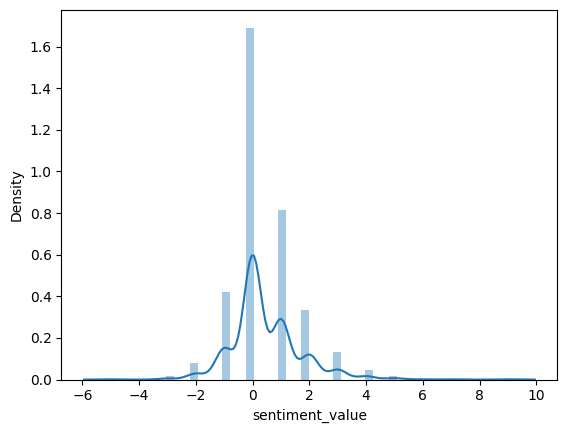

In [140]:
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

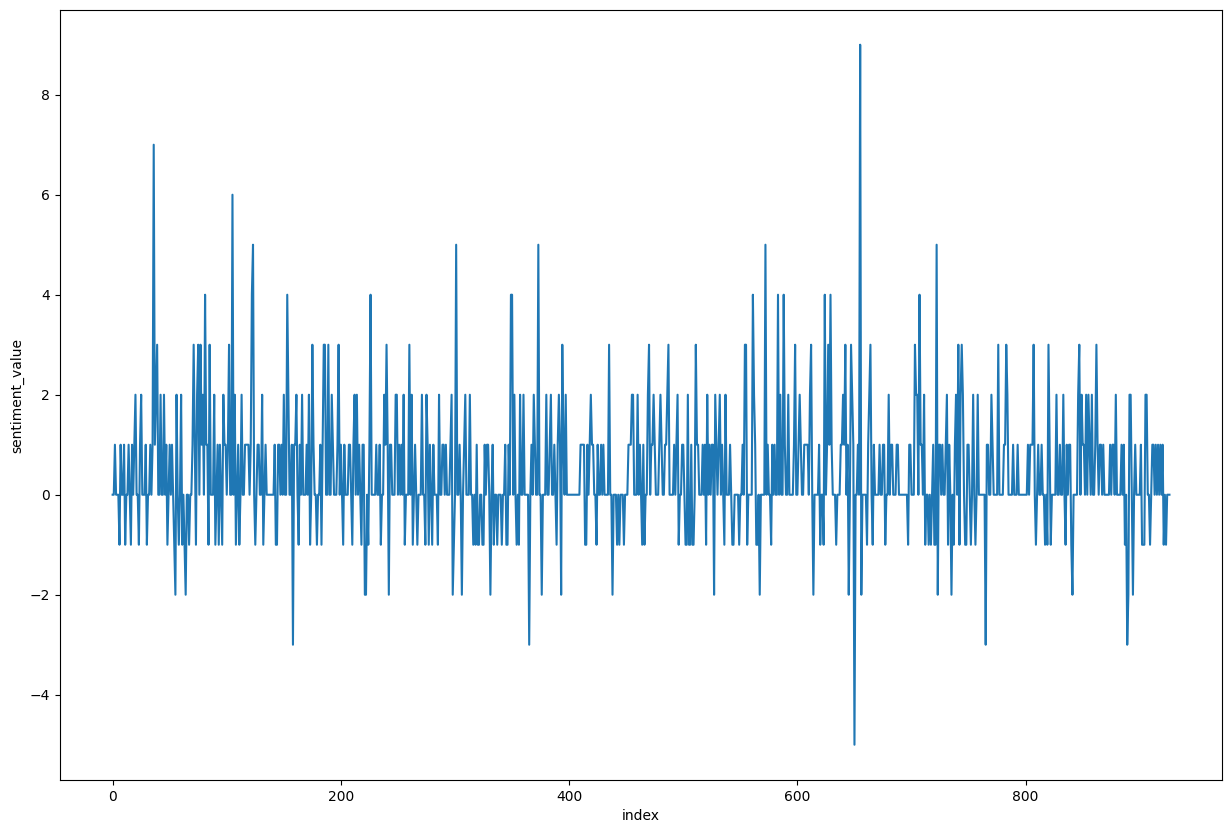

In [141]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

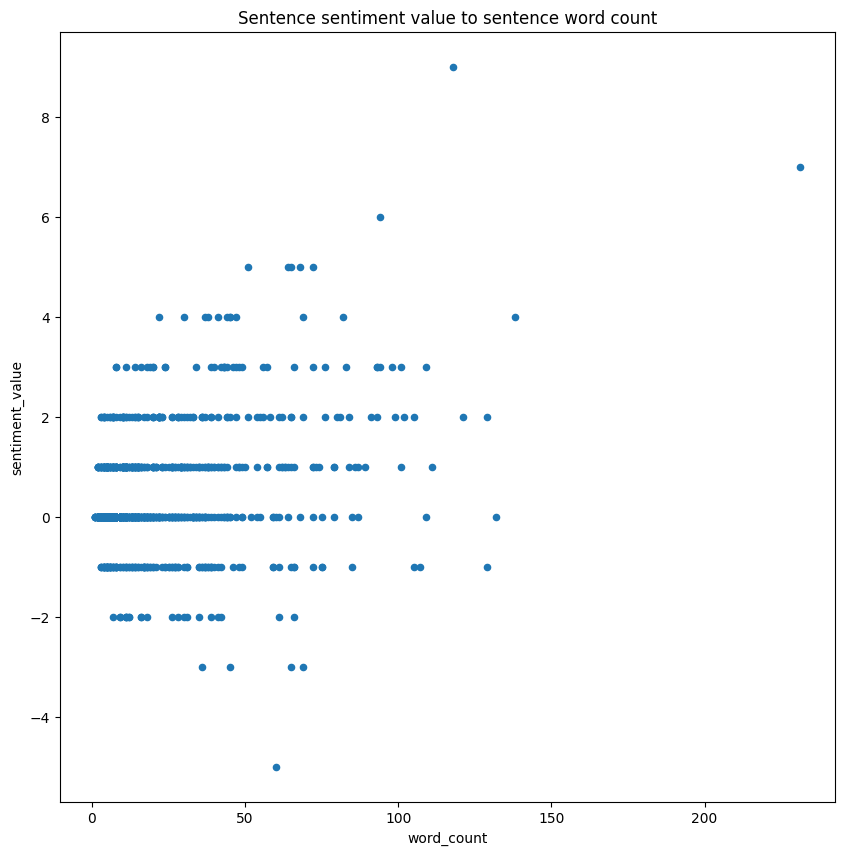

In [142]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,10),
                     title='Sentence sentiment value to sentence word count')